# Vehicle routing and its optimization

In [1]:
%matplotlib inline
from pylab import *

## DUO assignment

The default routing principle is based on *Dynamic User Optimum (DUO)*, which means that each vehicle basically chooses the minimum travel time path based on the current instantaneous travel time. Therefore, they are a kind of selfish and this is usually not optimal for the society.

In the following example, we simulate simple 2 routes network. One of the routes is shorter but narrower than the other. Thus, under the DUO routing, many traveler chooses the shorter route and create huge congestion, resulting inefficient traffic system.

simulation setting:
 scenario name: 
 simulation duration:	 1000 s
 number of vehicles:	 800 veh
 total road length:	 4000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 200
 number of platoons:	 160
 number of links:	 4
 number of nodes:	 4
 setup time:		 0.00 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      200 vehs|  10.5 m/s|     0.06 s
     995 s|        0 vehs|   0.0 m/s|     0.06 s
 simulation finished
results:
 average speed:	 11.3 m/s
 number of completed trips:	 800 / 800
 average travel time of trips:	 215.5 s
 average delay of trips:	 115.5 s
 delay ratio:			 0.536
Total travel time: 172425.0 s
Route 1 users: 490
Route 2 users: 310
 drawing trajectories in consecutive links...


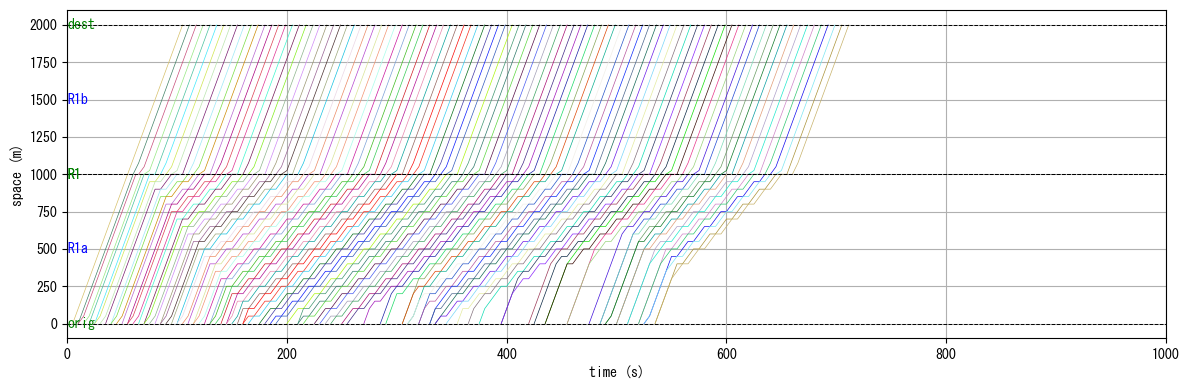

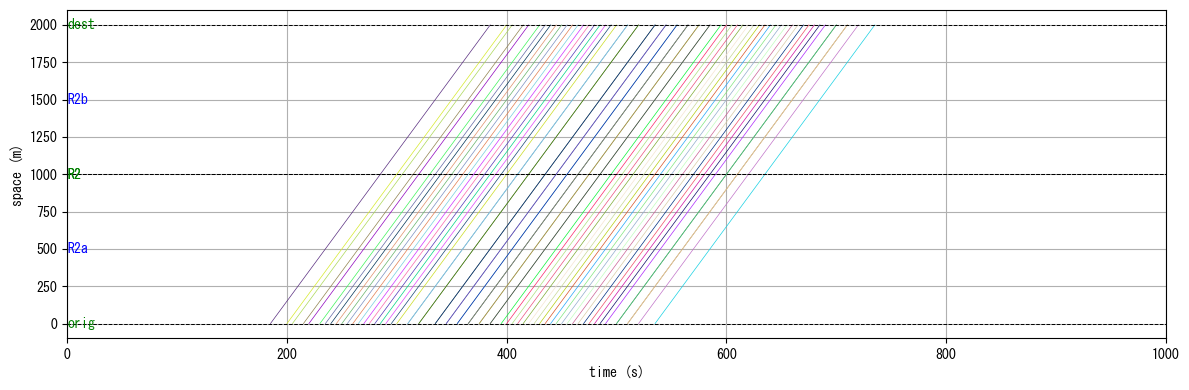

In [6]:
from uxsim import *

# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",    # Scenario name
    deltan=5,   # Simulation aggregation unit delta n
    tmax=1000,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options
    random_seed=0,    # Set the random seed
    duo_update_time=60
)

# Define the scenario
#network configuration
# O -- R1
# |     |
# R2 -- D
# route with R1 is faster but narrower than R2

W.addNode("orig", 0, 0)
W.addNode("R1", 1, 0)
W.addNode("R2", 0, 1)
W.addNode("dest", 1, 1)
W.addLink("R1a", "orig", "R1", length=1000, free_flow_speed=20, number_of_lanes=2)
W.addLink("R1b", "R1", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("R2a", "orig", "R2", length=1000, free_flow_speed=10, number_of_lanes=2)
W.addLink("R2b", "R2", "dest", length=1000, free_flow_speed=10, number_of_lanes=2)
route_R1 = ["R1a", "R1b"]
route_R2 = ["R2a", "R2b"]
W.adddemand("orig", "dest", 0, 500, 0.8*2)

# Run the simulation to the end
W.exec_simulation()

# Print summary of simulation result
W.analyzer.print_simple_stats()

df_link = W.analyzer.link_to_pandas()
r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
print(f"Total travel time: {W.analyzer.total_travel_time} s")
print(f"Route 1 users: {r1_users}")
print(f"Route 2 users: {r2_users}")


# Visualize 
W.analyzer.time_space_diagram_traj_links([route_R1, route_R2])

## Specify route of each vehicles

Let's consider how to improve the system's efficiency by controlling the vehicle routing. 

First, define the same world.

In [7]:
import random
from uxsim import *

# Define the main simulation
# Units are standardized to seconds (s) and meters (m)
W = World(
    name="",    # Scenario name
    deltan=5,   # Simulation aggregation unit delta n
    tmax=1000,  # Total simulation time (s)
    print_mode=1, save_mode=1, show_mode=1,    # Various options
    random_seed=0,    # Set the random seed
    duo_update_time=60
)

# Define the scenario
#network configuration
# O -- R1
# |     |
# R2 -- D
# route with R1 is faster but narrower than R2

W.addNode("orig", 0, 0)
W.addNode("R1", 1, 0)
W.addNode("R2", 0, 1)
W.addNode("dest", 1, 1)
W.addLink("R1a", "orig", "R1", length=1000, free_flow_speed=20, number_of_lanes=2)
W.addLink("R1b", "R1", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("R2a", "orig", "R2", length=1000, free_flow_speed=10, number_of_lanes=2)
W.addLink("R2b", "R2", "dest", length=1000, free_flow_speed=10, number_of_lanes=2)
W.adddemand("orig", "dest", 0, 500, 0.8*2)


By specifying `Vehicle.links_prefer` parameter, we can specify the route of that vehicle. In the example below, we simply set the route randomly.

In [8]:
# Random route specification
#vehicles will choose route1 with 50% probability
route1 = ["R1a", "R1b"]
route2 = ["R2a", "R2b"]
for veh in W.VEHICLES.values():
    if random.random() < 0.5:
        veh.links_prefer = route1
    else:
        veh.links_prefer = route2

This 50% random routing is actually more efficient than the DUO, because it assign the traffic volume evenly to the 2 routes. In the following result, you can see that the total travel time was reduced to about 130000 s from 170000 s of DUO.

simulation setting:
 scenario name: 
 simulation duration:	 1000 s
 number of vehicles:	 800 veh
 total road length:	 4000 m
 time discret. width:	 5 s
 platoon size:		 5 veh
 number of timesteps:	 200
 number of platoons:	 160
 number of links:	 4
 number of nodes:	 4
 setup time:		 1.40 s
simulating...
      time| # of vehicles| ave speed| computation time
       0 s|        0 vehs|   0.0 m/s|     0.00 s
     600 s|      135 vehs|  12.0 m/s|     0.05 s
     995 s|        0 vehs|   0.0 m/s|     0.06 s
 simulation finished
results:
 average speed:	 11.9 m/s
 number of completed trips:	 800 / 800
 average travel time of trips:	 170.2 s
 average delay of trips:	 70.2 s
 delay ratio:			 0.412
Total travel time: 136125.0 s
Route 1 users: 455
Route 2 users: 345
 drawing trajectories in consecutive links...


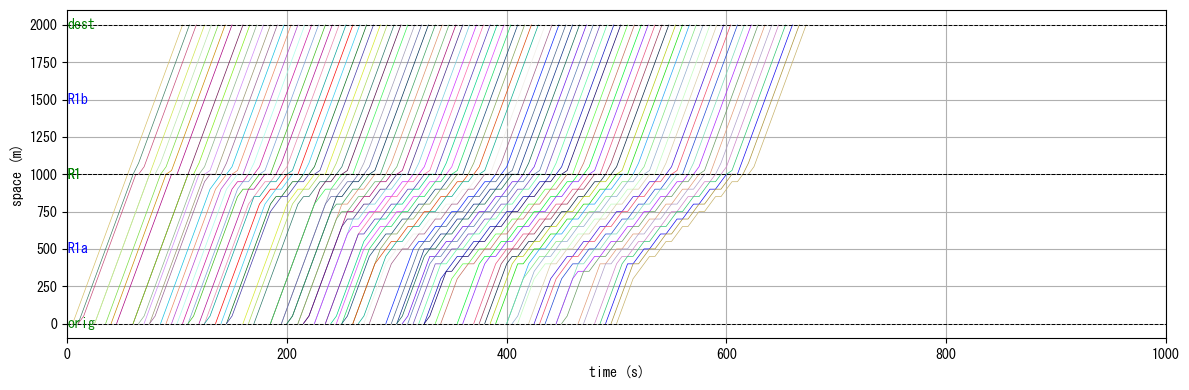

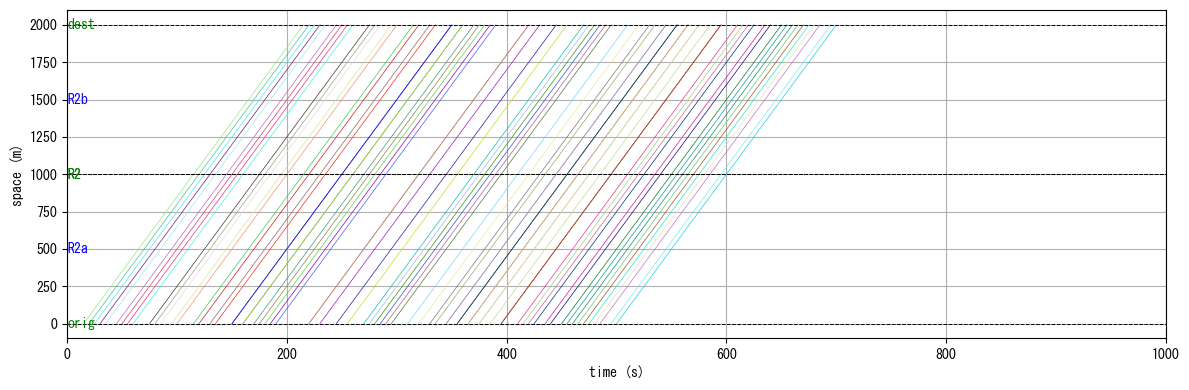

In [9]:

# Run the simulation to the end
W.exec_simulation()

# Print summary of simulation result
W.analyzer.print_simple_stats()

df_link = W.analyzer.link_to_pandas()
r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
print(f"Total travel time: {W.analyzer.total_travel_time} s")
print(f"Route 1 users: {r1_users}")
print(f"Route 2 users: {r2_users}")

# Visualize 
W.analyzer.time_space_diagram_traj_links([route1, route2])

## Optimal routing - Dynamic System Optimum

There exists the optimal routing of vehicles that minimizes the system total travel time. It is called *Dynamic System Optimum (DSO)*.

Now, we systematically derive near-DSO solution by using the genetic algorithm (GA), a common meta-heuristics for discrete optimization. We use a Python-package [DEAP](https://github.com/DEAP/deap) for this purpose.

(Please note that deriving DSO is difficult task in general. GA is not efficient approach for it. But, in this notebook, we just use it for simplicity.)

First, define a world as always.

In [2]:
import random
from deap import base, creator, tools, algorithms
from uxsim import *

W = World(
    name="", 
    deltan=5, 
    tmax=1000,
    print_mode=0, save_mode=1, show_mode=1, #print is off, otherwise it will be very verbose during the genetic algorithm
    random_seed=None,
    duo_update_time=60
)

# Define the scenario
#network configuration
# O -- R1
# |     |
# R2 -- D
#route with R1 is faster but narrower than R2

W.addNode("orig", 0, 0)
W.addNode("R1", 1, 0)
W.addNode("R2", 0, 1)
W.addNode("dest", 1, 1)
W.addLink("R1a", "orig", "R1", length=1000, free_flow_speed=20, number_of_lanes=2)
W.addLink("R1b", "R1", "dest", length=1000, free_flow_speed=20, number_of_lanes=1)
W.addLink("R2a", "orig", "R2", length=1000, free_flow_speed=10, number_of_lanes=2)
W.addLink("R2b", "R2", "dest", length=1000, free_flow_speed=10, number_of_lanes=2)
W.adddemand("orig", "dest", 0, 500, 0.8*2)

route1 = ["R1a", "R1b"]
route2 = ["R2a", "R2b"]

W_orig = W.copy()

Notice that we took a copy of this original world `W_orig` for later reuse.

Compute DUO as a reference. You can see congested traffic.

Total travel time: 173475.0 s
Route 1 users: 450
Route 2 users: 350


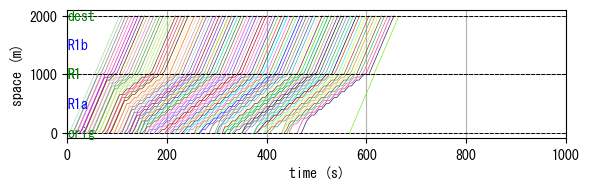

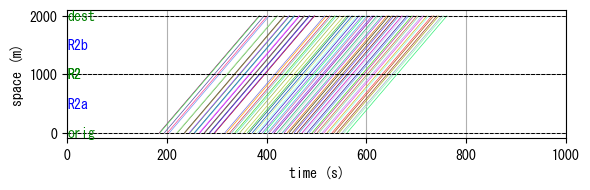

In [3]:
W.exec_simulation()

df_link = W.analyzer.link_to_pandas()
r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
print(f"Total travel time: {W.analyzer.total_travel_time} s")
print(f"Route 1 users: {r1_users}")
print(f"Route 2 users: {r2_users}")
W.analyzer.time_space_diagram_traj_links([route1, route2], figsize=(6,2))

W_duo = W.copy()

Now we prepare a GA using DEAP. The *fitness* in GA is defined as a total travel time, and the *gene* is defined as routing of each vehicles. The length of gene is equal to the number of platoon in UXsim.

In [4]:
# evaluate fitness by total travel time
def evaluate_by_total_travel_time(W):
    W.exec_simulation()
    print(W.analyzer.total_travel_time, end=" ")
    return - W.analyzer.total_travel_time,

# specify routing based on genome
def specify_routes(W, genome):
    veh_list = list(W.VEHICLES.values())
    for i, value in enumerate(genome):
        veh = veh_list[i]
        if value == 1:
            veh.set_links_prefer(route1)
        elif value == 0:
            veh.set_links_prefer(route2)
        else:
            raise ValueError("Invalid genome value")

Then, we execute GA by using standard codes of DEAP as follows. The population is 20 and the generation is 20.

In [7]:

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Initialize the individual
n_gene = len(W.VEHICLES)
toolbox.register("attr_gene", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=n_gene)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation, crossover, and mutation functions
toolbox.register("evaluate", evaluate_by_total_travel_time)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

# Execute genetic algorithm
NPOP = 20
CXPB, MUTPB = 0.5, 0.2
NGEN = 20

# Initial population
pop = toolbox.population(n=NPOP) 
for ind in pop:
    W = W_orig.copy()
    specify_routes(W, ind)
    ind.W = W
fitnesses = list(map(toolbox.evaluate, [ind.W for ind in pop]))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

for g in range(NGEN):
    print(f"-- Generation {g} --")
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    # Crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    for ind in invalid_ind:
        W = W_orig.copy()
        specify_routes(W, ind)
        ind.W = W
    fitnesses = map(toolbox.evaluate, [ind.W for ind in invalid_ind])
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Print the best individual
    best_ind = tools.selBest(pop, 1)[0]
    print("")
    print("Best individual: ", best_ind)
    print("Fitness: ", best_ind.fitness.values[0])
    df_link = best_ind.W.analyzer.link_to_pandas()
    r1_users = df_link["traffic_volume"][df_link["link"] == "R1a"].values[0]
    r2_users = df_link["traffic_volume"][df_link["link"] == "R2a"].values[0]
    print(f" Total travel time: {best_ind.W.analyzer.total_travel_time} s")
    print(f" Route 1 users: {r1_users}")
    print(f" Route 2 users: {r2_users}")
    #best_ind.W.analyzer.time_space_diagram_traj_links([route1, route2], figsize=(6,2))

    # Update the population
    pop[:] = offspring

127300.0 132500.0 133500.0 135375.0 131700.0 135200.0 135700.0 129925.0 131275.0 127075.0 135825.0 135175.0 129725.0 127725.0 137650.0 136600.0 129725.0 131825.0 125625.0 134725.0 -- Generation 0 --
130000.0 129725.0 127075.0 128550.0 129225.0 129900.0 130125.0 129125.0 127700.0 
Best individual:  [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0]
Fitness:  -125625.0
 Total travel time: 125625.0 s
 Route 1 users: 410
 Route 2 users: 390
-- Generation 1 --
126400.0 126475.0 127400.0 127325.0 127975.0 130800.0 128925.0 128125.0 124550.0 
Best individual:  [0, 0, 1, 

The best solution is visualized as follows. You can see that traffic congestion observed in DUO was almost eliminated, and the total travel time was reduced to about 120000 s. 

BTW, smart readers may have noticed that similar efficient states were already achieved even in the initial generations of GA. This is because the scale of this scenario is too small and random search done is sufficient to find near optimal solution. In the later section, we show a larger example.


Best individual:  [1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1]
Fitness:  -123575.0


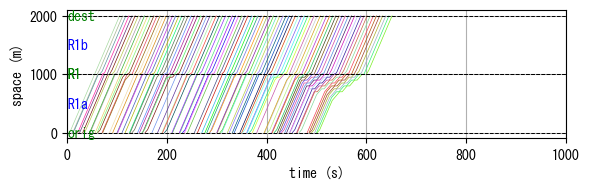

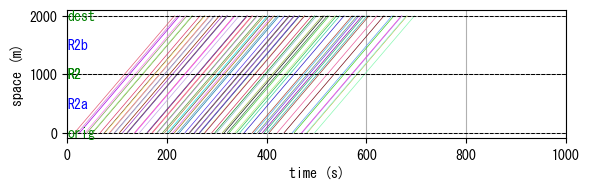

In [8]:

best_ind = tools.selBest(pop, 1)[0]
print("")
print("Best individual: ", best_ind)
print("Fitness: ", best_ind.fitness.values[0])
best_ind.W.analyzer.time_space_diagram_traj_links([["R1a", "R1b"], ["R2a", "R2b"]], figsize=(6,2))


Let's see the experienced travel time of each vehicle. In the following figure, we compare travel time of each vehicle in DUO and near DSO assignment. You can see that many vehicles experienced shorter travel time in DSO. However, few vehicles (upper left of 45-degree line) were forced to make longer travel times than DUO. In this sense, DSO is unfair compared with DUO. Thus, in the real world, some special measures such as pricing and incentives are required to achieve DSO.

Text(0, 0.5, 'travel time of each vehicle in DSO (s)')

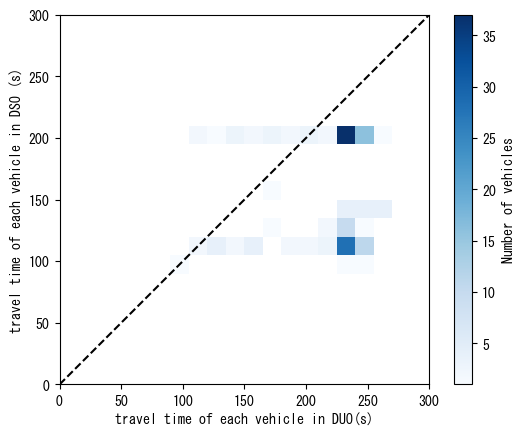

In [9]:
vehs_duo = list(W_duo.VEHICLES.values())
vehs_dso = list(best_ind.W.VEHICLES.values())

figure()
subplot(111, aspect="equal")
hist2d([veh.travel_time for veh in vehs_duo], [veh.travel_time for veh in vehs_dso], bins=20, range=[[0,300],[0,300]], cmap="Blues", cmin=1)
plot([0, 300], [0, 300], "--k")
colorbar().set_label("Number of vehicles")
xlabel("travel time of each vehicle in DUO(s)")
ylabel("travel time of each vehicle in DSO (s)")

## Optimal routing in a larger network

The following code shows a DSO example in a larger network. We use a 3x3 grid network, and we systematically enumerate available routes between OD pairs optimize the vehicle routing. This took some time; if you want to reduce the computation time, consider to reduce `NPOP` or `NGEN` (or implement parallel computing of GA or more efficient algorithms).

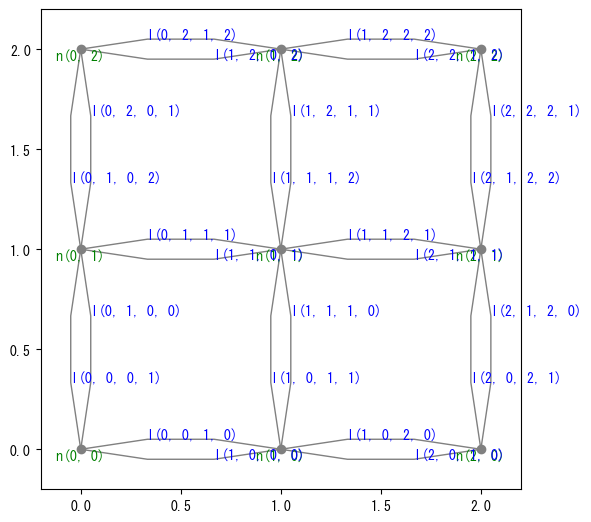

DUO


,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,885275.0,442.6375,485275.0,242.6375


available routes for each OD pair
('n(0, 0)', 'n(2, 2)') ['l(0, 0, 1, 0)', 'l(1, 0, 1, 1)', 'l(1, 1, 1, 2)', 'l(1, 2, 2, 2)']
('n(0, 0)', 'n(2, 2)') ['l(0, 0, 0, 1)', 'l(0, 1, 0, 2)', 'l(0, 2, 1, 2)', 'l(1, 2, 2, 2)']
('n(0, 0)', 'n(2, 2)') ['l(0, 0, 1, 0)', 'l(1, 0, 2, 0)', 'l(2, 0, 2, 1)', 'l(2, 1, 2, 2)']
('n(0, 0)', 'n(2, 2)') ['l(0, 0, 1, 0)', 'l(1, 0, 1, 1)', 'l(1, 1, 2, 1)', 'l(2, 1, 2, 2)']
('n(0, 0)', 'n(2, 2)') ['l(0, 0, 0, 1)', 'l(0, 1, 1, 1)', 'l(1, 1, 2, 1)', 'l(2, 1, 2, 2)']
('n(0, 0)', 'n(2, 2)') ['l(0, 0, 0, 1)', 'l(0, 1, 1, 1)', 'l(1, 1, 1, 2)', 'l(1, 2, 2, 2)']
('n(2, 0)', 'n(0, 2)') ['l(2, 0, 1, 0)', 'l(1, 0, 0, 0)', 'l(0, 0, 0, 1)', 'l(0, 1, 0, 2)']
('n(2, 0)', 'n(0, 2)') ['l(2, 0, 2, 1)', 'l(2, 1, 1, 1)', 'l(1, 1, 0, 1)', 'l(0, 1, 0, 2)']
('n(2, 0)', 'n(0, 2)') ['l(2, 0, 1, 0)', 'l(1, 0, 1, 1)', 'l(1, 1, 0, 1)', 'l(0, 1, 0, 2)']
('n(2, 0)', 'n(0, 2)') ['l(2, 0, 2, 1)', 'l(2, 1, 2, 2)', 'l(2, 2, 1, 2)', 'l(1, 2, 0, 2)']
('n(2, 0)', 'n(0, 2)') ['l(2, 0, 2, 1)', 'l(2,

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,647250.0,323.625,247250.0,123.625


-- Generation 1 --
660100.0 680250.0 656625.0 680800.0 660950.0 644300.0 683350.0 695550.0 699225.0 641575.0 663150.0 700475.0 678775.0 650450.0 679525.0 656775.0 663100.0 686875.0 693900.0 659625.0 684825.0 
Best individual:  [5, 4, 4, 0, 2, 1, 1, 0, 5, 2, 4, 1, 0, 1, 1, 1, 2, 3, 1, 5, 1, 2, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 4, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 5, 2, 2, 2, 4, 4, 0, 2, 5, 0, 0, 4, 0, 4, 5, 1, 2, 0, 0, 2, 0, 5, 3, 0, 4, 2, 0, 3, 0, 3, 2, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 5, 4, 5, 5, 4, 1, 5, 1, 5, 1, 0, 0, 3, 1, 4, 1, 2, 3, 3, 5, 4, 5, 2, 1, 3, 1, 3, 1, 5, 5, 3, 2, 4, 1, 3, 1, 3, 2, 3, 5, 2, 4, 0, 1, 2, 3, 0, 0, 0, 0, 5, 4, 5, 5, 4, 2, 0, 2, 5, 0, 4, 3, 2, 2, 3, 3, 5, 4, 4, 4, 4, 1, 0, 5, 5, 4, 1, 4, 4, 0, 4, 1, 0, 0, 2, 3, 5, 3, 2, 0, 2, 3, 3, 1, 3, 3, 0, 3, 4, 3, 0, 2, 0, 5, 5, 5, 1, 3, 4, 1, 1, 5, 0, 4, 3, 5, 4, 0, 1, 2, 1, 3, 3, 2, 2, 1, 0, 2, 1, 3, 3, 5, 0, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,634775.0,317.3875,234775.0,117.3875


-- Generation 2 --
673175.0 639325.0 664200.0 660200.0 657150.0 643925.0 625600.0 663525.0 669825.0 672025.0 686150.0 657600.0 660775.0 660000.0 638600.0 641375.0 662625.0 646300.0 
Best individual:  [5, 4, 4, 0, 2, 1, 1, 0, 5, 2, 4, 1, 0, 1, 1, 1, 2, 3, 1, 5, 1, 2, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 4, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 5, 2, 2, 2, 4, 4, 0, 2, 5, 0, 0, 4, 0, 4, 5, 1, 2, 0, 0, 2, 0, 5, 3, 0, 4, 2, 0, 3, 0, 3, 2, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 5, 4, 5, 5, 4, 1, 5, 1, 5, 1, 0, 0, 3, 1, 4, 1, 2, 3, 3, 5, 4, 5, 2, 1, 3, 1, 3, 1, 5, 5, 3, 2, 4, 1, 3, 1, 3, 2, 3, 5, 2, 4, 0, 1, 2, 3, 0, 0, 0, 0, 5, 4, 5, 5, 4, 2, 0, 2, 5, 0, 4, 3, 2, 2, 3, 3, 5, 4, 4, 4, 4, 1, 0, 5, 5, 4, 1, 4, 4, 0, 4, 1, 0, 0, 2, 3, 5, 3, 2, 0, 2, 3, 3, 1, 3, 3, 0, 3, 4, 3, 0, 2, 0, 5, 5, 5, 1, 3, 4, 1, 1, 5, 0, 4, 3, 5, 4, 0, 1, 2, 1, 3, 3, 2, 2, 1, 0, 2, 1, 3, 3, 5, 0, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,634775.0,317.3875,234775.0,117.3875


-- Generation 3 --
639750.0 641425.0 649675.0 674125.0 654025.0 650000.0 635125.0 640375.0 647625.0 642475.0 630525.0 652575.0 644450.0 642150.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 3, 0, 1, 5, 0, 1, 5, 4, 3, 3, 4, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 2, 3, 2, 4, 0, 3, 2, 2, 2, 2, 0, 0, 3, 5, 3, 3, 2, 0, 5, 4, 5, 2, 1, 0, 0, 3, 2, 4, 1, 0, 3, 5, 2, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 5, 4, 4, 5, 4, 0, 4, 1, 1, 1, 4, 0, 4, 4, 2, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 0, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 5, 4, 5, 1, 4, 4, 3, 1, 5, 0, 3, 1, 2, 4, 3, 2, 1, 3, 1, 3, 3, 5, 4, 3, 1, 2, 1, 1, 0

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,625600.0,312.8,225600.0,112.8


-- Generation 4 --
645600.0 641725.0 653025.0 649725.0 672275.0 638250.0 635250.0 616175.0 641275.0 673275.0 643600.0 639400.0 642525.0 637325.0 655425.0 632425.0 637850.0 639525.0 645175.0 630975.0 694150.0 643850.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 3, 0, 1, 5, 0, 1, 5, 4, 3, 3, 4, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 2, 3, 2, 4, 0, 3, 2, 2, 2, 2, 0, 0, 3, 5, 3, 3, 2, 0, 5, 4, 5, 2, 1, 0, 0, 3, 2, 4, 1, 0, 3, 5, 2, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 5, 4, 4, 5, 4, 0, 4, 1, 1, 1, 4, 0, 4, 4, 2, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 0, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 5, 4, 5, 1, 4

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,625600.0,312.8,225600.0,112.8


-- Generation 5 --
665775.0 634650.0 626225.0 628000.0 634200.0 645575.0 624925.0 654675.0 607525.0 627875.0 643100.0 641400.0 636550.0 658775.0 640750.0 621925.0 644450.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 3, 0, 1, 5, 0, 1, 5, 4, 3, 3, 4, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 2, 3, 2, 4, 0, 3, 2, 2, 2, 2, 0, 0, 3, 5, 3, 3, 2, 0, 5, 4, 5, 2, 1, 0, 0, 3, 2, 4, 1, 4, 1, 5, 1, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 5, 4, 4, 5, 4, 0, 4, 1, 1, 1, 4, 0, 4, 4, 2, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 0, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 5, 4, 5, 1, 4, 4, 3, 1, 5, 0, 3, 1, 2, 4, 3, 2, 1, 3, 1, 3

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,616175.0,308.0875,216175.0,108.0875


-- Generation 6 --
630700.0 624825.0 644225.0 628075.0 653400.0 669525.0 649400.0 649150.0 627300.0 631750.0 624350.0 615525.0 647275.0 621400.0 666975.0 631825.0 610050.0 645575.0 667675.0 
Best individual:  [5, 4, 4, 0, 2, 1, 1, 0, 5, 2, 4, 1, 0, 0, 1, 0, 2, 3, 1, 5, 1, 2, 0, 2, 2, 0, 1, 0, 3, 1, 0, 5, 4, 3, 5, 4, 0, 0, 1, 5, 2, 0, 0, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 1, 4, 0, 2, 5, 5, 2, 3, 0, 1, 5, 0, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 1, 5, 2, 0, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 1, 5, 4, 1, 5, 4, 0, 0, 1, 1, 0, 4, 0, 4, 4, 2, 5, 2, 5, 1, 2, 3, 5, 4, 0, 4, 0, 0, 1, 0, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 0, 1, 1, 2, 2, 1, 0, 1, 4, 3, 4, 0, 0, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 1, 5, 2, 2, 0, 4, 3, 1, 4, 2, 4, 1, 0, 0, 3, 2, 1, 0, 1, 0, 0, 0, 0, 5, 4, 5, 0, 4, 4, 3, 1, 5, 0, 3, 1, 0, 4

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,607525.0,303.7625,207525.0,103.7625


-- Generation 7 --
630950.0 627250.0 634500.0 635250.0 641275.0 604900.0 637000.0 638250.0 614750.0 635275.0 635400.0 630050.0 682025.0 636175.0 617600.0 634925.0 615600.0 
Best individual:  [5, 4, 4, 0, 2, 1, 1, 0, 5, 2, 4, 1, 0, 0, 1, 0, 2, 3, 1, 5, 1, 2, 0, 2, 2, 0, 1, 0, 3, 1, 0, 5, 4, 3, 5, 4, 0, 0, 1, 5, 2, 0, 0, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 1, 4, 0, 2, 5, 5, 2, 3, 0, 1, 5, 0, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 1, 5, 2, 0, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 1, 5, 4, 1, 5, 4, 0, 0, 1, 1, 0, 4, 0, 4, 4, 2, 5, 2, 5, 1, 2, 3, 5, 4, 0, 4, 0, 0, 1, 0, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 0, 1, 1, 2, 2, 1, 0, 1, 4, 3, 4, 0, 0, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 1, 5, 2, 2, 0, 4, 3, 1, 4, 2, 4, 1, 0, 0, 3, 2, 1, 0, 1, 0, 0, 0, 0, 5, 4, 5, 0, 4, 4, 3, 1, 5, 0, 3, 1, 0, 4, 3, 2, 0, 3, 1, 0

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,607525.0,303.7625,207525.0,103.7625


-- Generation 8 --
649450.0 644800.0 620550.0 655225.0 650725.0 609625.0 629025.0 646000.0 630000.0 641750.0 627850.0 635350.0 635275.0 621200.0 604750.0 642700.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 0, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 1, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 3, 0, 1, 5, 0, 1, 5, 4, 3, 3, 4, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 2, 2, 2, 2, 0, 0, 3, 5, 3, 0, 0, 0, 1, 4, 5, 2, 1, 0, 5, 3, 4, 1, 0, 4, 1, 5, 1, 0, 4, 0, 1, 2, 5, 3, 1, 2, 2, 3, 0, 4, 4, 3, 0, 5, 4, 4, 5, 4, 0, 0, 1, 1, 1, 4, 0, 4, 4, 2, 5, 0, 5, 1, 2, 0, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 1, 0, 0, 1, 5, 4, 5, 1, 4, 4, 0, 1, 5, 0, 3, 0, 2, 4, 0, 2, 1, 3, 1, 3, 3, 5, 4

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,604900.0,302.45,204900.0,102.45


-- Generation 9 --
612025.0 610450.0 614650.0 610450.0 658100.0 636775.0 611525.0 610975.0 645150.0 611000.0 616625.0 621325.0 628400.0 636925.0 610750.0 636500.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 4, 3, 5, 4, 3, 0, 1, 5, 2, 1, 1, 5, 5, 4, 3, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 5, 2, 1, 2, 4, 4, 0, 2, 5, 0, 0, 4, 1, 4, 5, 1, 2, 0, 0, 2, 1, 5, 3, 1, 4, 2, 0, 3, 0, 3, 0, 2, 2, 2, 0, 4, 1, 2, 0, 1, 2, 0, 5, 0, 0, 0, 4, 0, 2, 5, 0, 0, 3, 0, 1, 5, 0, 2, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 1, 1, 5, 0, 5, 2, 1, 4, 5, 3, 2, 0, 1, 4, 1, 5, 1, 1, 4, 3, 0, 2, 5, 3, 0, 0, 4, 0, 4, 4, 2, 5, 2, 1, 0, 3, 0, 3, 4, 5, 2, 3, 2, 0, 5, 4, 0, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 0, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 5, 4, 5, 1, 4, 4, 3, 1, 5, 0, 3, 1, 2, 4, 3, 2, 1, 3, 1, 3, 3, 5, 4

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,604750.0,302.375,204750.0,102.375


-- Generation 10 --
630125.0 603250.0 631075.0 650525.0 622275.0 613650.0 622175.0 618075.0 613675.0 626750.0 606000.0 651825.0 642500.0 620425.0 638850.0 657525.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 4, 3, 5, 4, 3, 0, 1, 5, 2, 1, 1, 5, 5, 4, 3, 0, 0, 2, 1, 2, 1, 2, 0, 1, 0, 5, 2, 1, 2, 4, 4, 0, 2, 5, 0, 0, 4, 1, 4, 5, 1, 2, 0, 0, 2, 1, 5, 3, 1, 4, 2, 0, 3, 0, 3, 0, 2, 2, 2, 0, 4, 1, 2, 0, 1, 2, 0, 5, 0, 0, 0, 4, 0, 2, 5, 0, 0, 3, 0, 1, 5, 0, 2, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 1, 1, 5, 0, 5, 2, 1, 4, 5, 3, 2, 0, 1, 4, 1, 5, 1, 1, 4, 3, 0, 2, 5, 3, 0, 0, 4, 0, 4, 4, 2, 5, 2, 1, 0, 3, 0, 3, 4, 5, 2, 3, 2, 0, 5, 4, 0, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 0, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 0, 0, 0, 1, 5, 4, 5, 1, 4, 4, 3, 1, 5, 0, 3, 1, 2, 4, 3, 2, 1, 3, 1, 3, 3, 5, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,604750.0,302.375,204750.0,102.375


-- Generation 11 --
594150.0 616350.0 669225.0 639075.0 608325.0 610300.0 609825.0 622125.0 600500.0 602075.0 613775.0 609250.0 640150.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 0, 0, 1, 5, 0, 1, 5, 4, 3, 3, 0, 2, 1, 5, 0, 0, 0, 0, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 0, 3, 2, 4, 0, 3, 2, 2, 2, 2, 0, 0, 0, 5, 3, 3, 0, 0, 5, 4, 5, 2, 1, 1, 0, 3, 2, 4, 1, 4, 1, 5, 1, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 1, 0, 0, 1, 5, 4, 5, 1, 4, 4, 0, 1, 5, 0, 3, 0, 2, 4, 0, 2, 1, 3, 1, 3, 3, 5, 4, 3, 1, 2, 1, 1, 0, 4, 0, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,603250.0,301.625,203250.0,101.625


-- Generation 12 --
611950.0 613850.0 612500.0 618475.0 597400.0 629975.0 616650.0 614925.0 615500.0 592975.0 605550.0 611150.0 628075.0 608250.0 622650.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 0, 2, 0, 1, 0, 2, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 0, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 0, 0, 1, 5, 0, 1, 5, 4, 3, 3, 0, 2, 1, 5, 0, 0, 0, 0, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 0, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 1, 1, 5, 0, 5, 2, 1, 4, 5, 3, 2, 0, 1, 4, 1, 5, 1, 1, 4, 3, 0, 2, 5, 3, 0, 0, 4, 0, 4, 4, 2, 5, 2, 1, 0, 3, 0, 3, 4, 5, 2, 3, 2, 0, 5, 4, 0, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2, 5, 4, 5, 1, 0, 2, 3, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,594150.0,297.075,194150.0,97.075


-- Generation 13 --
649550.0 591750.0 613925.0 608025.0 597900.0 638350.0 619975.0 628675.0 620625.0 600125.0 614300.0 612050.0 599375.0 606475.0 595250.0 602550.0 620650.0 600275.0 621100.0 609300.0 597325.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 0, 0, 1, 5, 0, 1, 5, 4, 3, 3, 0, 2, 1, 5, 0, 0, 0, 0, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 0, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 1, 1, 5, 0, 5, 2, 1, 4, 5, 3, 2, 0, 1, 4, 1, 5, 1, 1, 4, 3, 0, 2, 5, 3, 0, 0, 4, 0, 4, 4, 2, 5, 2, 1, 0, 3, 0, 3, 4, 5, 2, 3, 2, 0, 5, 4, 0, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,592975.0,296.4875,192975.0,96.4875


-- Generation 14 --
620400.0 619025.0 610800.0 591850.0 593350.0 605325.0 625675.0 664850.0 616450.0 605625.0 593125.0 596450.0 600200.0 594050.0 608025.0 601125.0 617700.0 633675.0 631125.0 607700.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 0, 0, 1, 5, 0, 1, 5, 4, 3, 3, 0, 2, 1, 5, 0, 0, 0, 0, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 0, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 1, 1, 5, 0, 5, 2, 1, 4, 5, 3, 2, 0, 1, 4, 1, 5, 1, 1, 4, 3, 0, 2, 5, 3, 0, 0, 4, 0, 4, 4, 2, 5, 2, 1, 0, 3, 0, 3, 4, 5, 2, 3, 2, 0, 5, 4, 0, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,591750.0,295.875,191750.0,95.875


-- Generation 15 --
614600.0 595675.0 629725.0 623200.0 609600.0 623925.0 613150.0 618975.0 600800.0 611850.0 588925.0 595350.0 631100.0 628225.0 601025.0 595325.0 611600.0 598325.0 638275.0 596075.0 
Best individual:  [5, 4, 4, 0, 2, 0, 1, 2, 0, 1, 2, 0, 3, 0, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 0, 3, 0, 1, 2, 5, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 1, 0, 0, 1, 5, 4, 5, 1, 4, 4, 0, 1, 5, 0, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,591850.0,295.925,191850.0,95.925


-- Generation 16 --
621575.0 602925.0 593425.0 584050.0 607050.0 590350.0 593300.0 649975.0 588200.0 591725.0 599225.0 632325.0 627000.0 600075.0 648400.0 592750.0 649900.0 596725.0 593500.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 0, 0, 1, 5, 0, 1, 5, 4, 3, 3, 0, 2, 1, 5, 0, 0, 0, 0, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 0, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 1, 1, 5, 0, 5, 2, 1, 4, 5, 3, 2, 0, 1, 4, 1, 5, 1, 1, 4, 3, 0, 2, 5, 3, 0, 0, 4, 0, 4, 4, 2, 5, 2, 1, 0, 3, 0, 3, 4, 5, 2, 3, 2, 0, 5, 4, 0, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 1, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,588925.0,294.4625,188925.0,94.4625


-- Generation 17 --
614850.0 619350.0 624975.0 583300.0 593125.0 592800.0 591825.0 591100.0 602650.0 587400.0 597600.0 596950.0 599425.0 592050.0 591750.0 581700.0 605750.0 632650.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 3, 0, 1, 2, 5, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 1, 5, 5, 5, 0, 1, 2, 1, 4, 3, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 0, 2, 2, 1, 4, 3, 1, 0, 2, 4, 1, 0, 0, 0, 0, 1, 5, 0, 1, 0, 0, 3, 5, 4, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,584050.0,292.025,184050.0,92.025


-- Generation 18 --
593475.0 597975.0 597000.0 596575.0 589075.0 590900.0 620850.0 620850.0 592700.0 586500.0 610600.0 590200.0 592725.0 598075.0 591325.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2, 5, 4, 5, 1, 0, 2, 3, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,581700.0,290.85,181700.0,90.85


-- Generation 19 --
591200.0 587100.0 608850.0 586650.0 588525.0 611850.0 620600.0 584500.0 599550.0 595250.0 582550.0 622300.0 589150.0 594725.0 594225.0 591475.0 587125.0 620100.0 583425.0 606200.0 591900.0 591225.0 598775.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,581700.0,290.85,181700.0,90.85


-- Generation 20 --
592850.0 592375.0 584575.0 588650.0 615100.0 590175.0 580350.0 622875.0 588075.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2, 5, 4, 5, 1, 0, 2, 3, 1, 2, 1, 1, 5, 4, 0, 1, 1, 0, 2, 1, 4, 2, 0, 3, 2, 2, 5, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,581700.0,290.85,181700.0,90.85


-- Generation 21 --
579300.0 580975.0 595350.0 626325.0 594050.0 584250.0 636850.0 582625.0 591525.0 639100.0 579850.0 588000.0 584500.0 589425.0 583350.0 591950.0 586950.0 591625.0 599875.0 582775.0 622325.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,580350.0,290.175,180350.0,90.175


-- Generation 22 --
593250.0 630875.0 590975.0 593225.0 586450.0 590925.0 592900.0 580275.0 589275.0 615925.0 594650.0 598450.0 618900.0 591900.0 580650.0 583850.0 592500.0 589150.0 580200.0 590400.0 591775.0 581675.0 594275.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 0, 5, 5, 4, 0, 0, 0, 1, 5, 0, 1, 5, 4, 3, 3, 0, 2, 1, 5, 0, 0, 0, 0, 2, 2, 5, 5, 0, 3, 4, 1, 5, 3, 0, 3, 2, 4, 0, 3, 0, 1, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,579300.0,289.65,179300.0,89.65


-- Generation 23 --
588700.0 586000.0 586250.0 629475.0 591225.0 598100.0 610825.0 605075.0 582300.0 606125.0 585650.0 617350.0 581300.0 591150.0 589325.0 583025.0 591925.0 593500.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,580200.0,290.1,180200.0,90.1


-- Generation 24 --
609800.0 585825.0 594250.0 589275.0 591700.0 585850.0 618050.0 591575.0 586200.0 585900.0 617025.0 611250.0 587175.0 604425.0 588200.0 617300.0 605350.0 589925.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,580200.0,290.1,180200.0,90.1


-- Generation 25 --
589650.0 589825.0 574275.0 585525.0 616275.0 614650.0 624425.0 588025.0 604675.0 605350.0 605850.0 581900.0 578475.0 584350.0 585725.0 585600.0 612425.0 
Best individual:  [2, 1, 0, 2, 0, 4, 4, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 3, 1, 2, 0, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 3, 4, 0, 5, 1, 3, 0, 1, 2, 5, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 0, 5, 0, 1, 0, 4, 4, 1, 2, 5, 0, 0, 4, 1, 4, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 5, 0, 5, 1, 2, 3, 5, 4, 0, 4, 4, 0, 1, 1, 4, 0, 2, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2, 5, 4, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,580200.0,290.1,180200.0,90.1


-- Generation 26 --
590900.0 590400.0 581200.0 612600.0 578375.0 596150.0 605725.0 583325.0 616225.0 593325.0 588050.0 586675.0 623725.0 591575.0 615425.0 590225.0 585600.0 606200.0 584700.0 592075.0 600600.0 587700.0 582775.0 601125.0 611225.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 1, 1, 2, 2, 1, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,574275.0,287.1375,174275.0,87.1375


-- Generation 27 --
583075.0 582225.0 577225.0 587800.0 582575.0 583400.0 589700.0 582800.0 609125.0 594325.0 586175.0 611850.0 601125.0 584500.0 591125.0 618550.0 592600.0 632600.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,578375.0,289.1875,178375.0,89.1875


-- Generation 28 --
586100.0 585925.0 626450.0 580350.0 585150.0 586575.0 585425.0 626200.0 592075.0 615550.0 608900.0 581700.0 590350.0 598850.0 584825.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2, 5, 4, 5, 1, 0, 2, 3, 1, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,577225.0,288.6125,177225.0,88.6125


-- Generation 29 --
588975.0 592450.0 585250.0 574675.0 575025.0 587750.0 593525.0 578550.0 610200.0 587225.0 619250.0 582175.0 582100.0 587800.0 599400.0 589075.0 593375.0 
Best individual:  [2, 0, 1, 2, 5, 4, 0, 2, 0, 1, 2, 0, 3, 1, 1, 4, 5, 0, 1, 2, 2, 4, 2, 2, 2, 0, 1, 0, 3, 1, 1, 5, 0, 3, 5, 4, 3, 0, 1, 5, 2, 0, 1, 5, 5, 4, 3, 2, 2, 2, 1, 2, 1, 2, 1, 1, 3, 5, 0, 0, 5, 0, 5, 1, 1, 2, 1, 4, 0, 2, 2, 4, 0, 0, 5, 5, 3, 3, 4, 2, 4, 1, 0, 5, 4, 4, 0, 0, 1, 4, 2, 0, 4, 1, 2, 0, 1, 2, 1, 5, 0, 0, 0, 4, 2, 2, 5, 0, 0, 3, 4, 1, 0, 3, 2, 3, 2, 4, 0, 3, 0, 0, 2, 2, 0, 0, 3, 5, 3, 3, 0, 1, 5, 4, 5, 2, 1, 4, 5, 3, 2, 0, 1, 3, 3, 5, 0, 3, 0, 5, 0, 1, 3, 0, 2, 2, 2, 3, 3, 4, 4, 3, 0, 0, 4, 4, 5, 4, 2, 0, 3, 3, 2, 3, 5, 0, 1, 0, 1, 0, 1, 0, 3, 4, 5, 2, 2, 1, 0, 3, 1, 0, 0, 1, 0, 5, 1, 4, 4, 1, 4, 3, 1, 3, 0, 1, 2, 2, 0, 0, 5, 4, 3, 0, 1, 2, 4, 4, 2, 2, 3, 2, 2, 1, 0, 1, 1, 0, 5, 2, 2, 2, 3, 0, 2, 4, 4, 2, 5, 0, 1, 1, 1, 4, 1, 3, 5, 0, 0, 3, 5, 5, 4, 5, 5, 2, 0, 3, 1, 3, 0, 0, 2, 0, 5, 1, 2, 5, 4, 

,total_trips,completed_trips,total_travel_time,average_travel_time,total_delay,average_delay
0,2000,2000,577225.0,288.6125,177225.0,88.6125


DUO


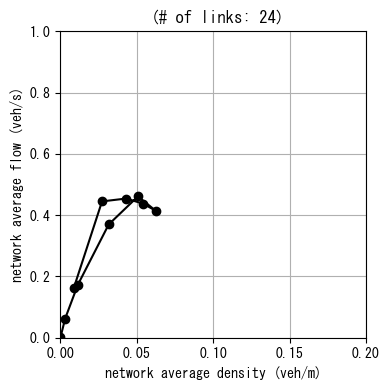

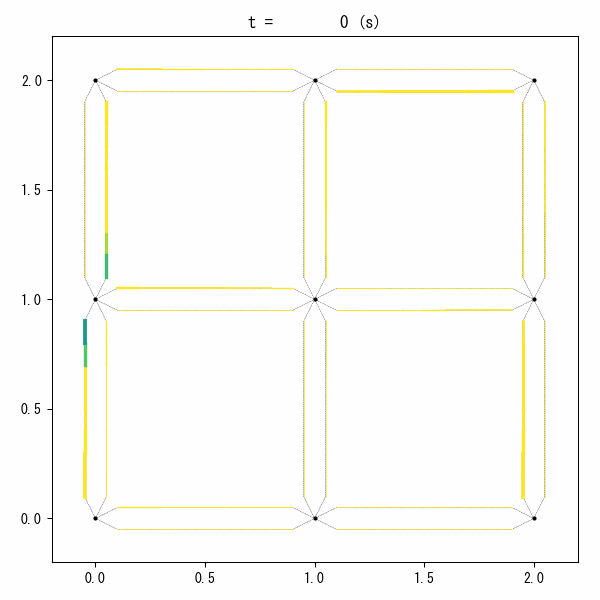

near-DSO


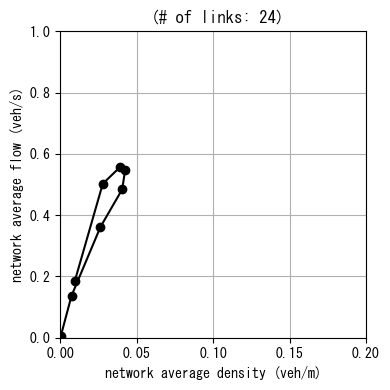

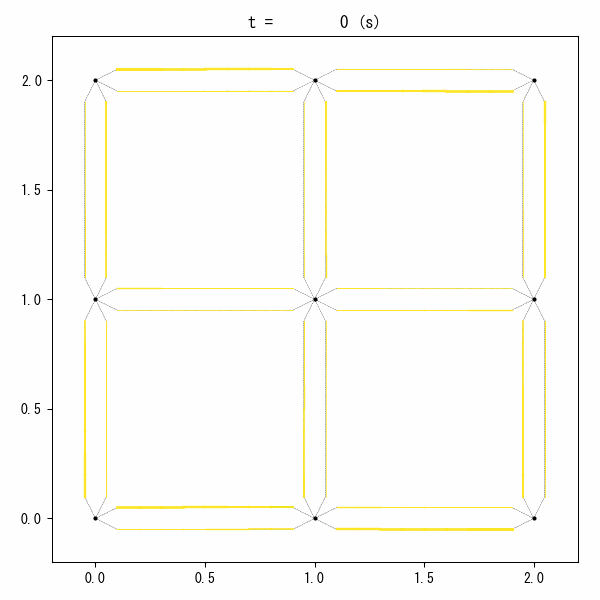

Vehicle comparison


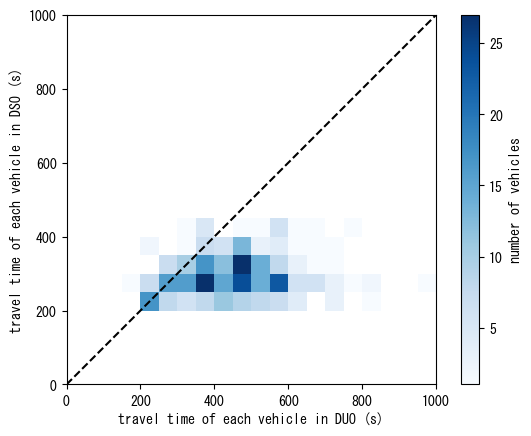

In [2]:
import random
from deap import base, creator, tools, algorithms
from uxsim import *
from uxsim import Utilities

##############################################################
# Define UXsim World
W = World(
    name="", 
    deltan=5, 
    tmax=1200,
    print_mode=0, save_mode=1, show_mode=1, #print is off, otherwise it will be very verbose during the genetic algorithm
    random_seed=None,
    duo_update_time=60
)

## generate grid network
Utilities.generate_grid_network(W, 3, 3, length=1000)
W.show_network()

## set demand
od_pairs = [
    ("n(0, 0)", "n(2, 2)"),
    ("n(2, 0)", "n(0, 2)"),
    ("n(0, 2)", "n(2, 0)"),
    ("n(2, 2)", "n(0, 0)"),
]
for od_pair in od_pairs:
    W.adddemand(od_pair[0], od_pair[1], 0, 500, 1)

W_orig = W.copy()
        
##############################################################
# Compute DUO as a reference
print("Deriving DUO")
W.exec_simulation()
display(W.analyzer.basic_to_pandas())

W_duo= W.copy()

##############################################################
# enumerate some routes between each OD pair
routes = {}
n_routes = 6
for od_pair in od_pairs:
    routes[od_pair] = Utilities.enumerate_k_shortest_routes(W, od_pair[0], od_pair[1], n_routes)

print("available routes for each OD pair")
for key in routes:
    for route in routes[key]:
        print(key, route)
        
##############################################################
# Prepare genetic algorithm using DEAP
# evaluate fitness by total travel time
def evaluate_by_total_travel_time(W):
    W.exec_simulation()
    print(W.analyzer.total_travel_time, end=" ")
    return - W.analyzer.total_travel_time,

# specify routing based on genome
def specify_routes(W, genome):
    veh_list = list(W.VEHICLES.values())
    for i, value in enumerate(genome):
        veh = veh_list[i]
        veh.set_links_prefer(routes[(veh.orig.name, veh.dest.name)][value])

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

# Initialize the individual
n_gene = len(W.VEHICLES)
toolbox.register("attr_gene", random.randint, 0, 5)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_gene, n=n_gene)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the evaluation, crossover, and mutation functions
toolbox.register("evaluate", evaluate_by_total_travel_time)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)


##############################################################
# Execute genetic algorithm
print("Deriving DSO using genetic algorithm")
NPOP = 30
CXPB, MUTPB = 0.5, 0.2
NGEN = 30

# Initial population
pop = toolbox.population(n=NPOP) 
for ind in pop:
    W = W_orig.copy()
    specify_routes(W, ind)
    ind.W = W
fitnesses = list(map(toolbox.evaluate, [ind.W for ind in pop]))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

for g in range(NGEN):
    print(f"-- Generation {g} --")
    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    # Crossover and mutation
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    for ind in invalid_ind:
        W = W_orig.copy()
        specify_routes(W, ind)
        ind.W = W
    fitnesses = map(toolbox.evaluate, [ind.W for ind in invalid_ind])
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # Print the best individual
    best_ind = tools.selBest(pop, 1)[0]
    print("")
    print("Best individual: ", best_ind)
    print("Fitness: ", best_ind.fitness.values[0])
    display(best_ind.W.analyzer.basic_to_pandas())

    # Update the population
    pop[:] = offspring

W_dso = best_ind.W.copy()

##############################################################
# Compare DUO and near-DSO

print("DUO")
W_duo.analyzer.macroscopic_fundamental_diagram()
W_duo.analyzer.network_anim(file_name="out/grid_duo.gif", detailed=1, network_font_size=0, figsize=(6,6))
display_image_in_notebook("out/grid_duo.gif")

print("near-DSO")
W_dso.analyzer.macroscopic_fundamental_diagram()
W_dso.analyzer.network_anim(file_name="out/grid_dso.gif", detailed=1, network_font_size=0, figsize=(6,6))
display_image_in_notebook("out/grid_dso.gif")

print("Vehicle comparison")
figure()
subplot(111, aspect="equal")
hist2d(
    [veh.travel_time for veh in W_duo.VEHICLES.values()],
    [veh.travel_time for veh in W_dso.VEHICLES.values()],
    bins=20, range=[[0,1000],[0,1000]], cmap="Blues", cmin=1
)
colorbar().set_label("number of vehicles")
plot([0,1000], [0,1000], "k--")
xlabel("travel time of each vehicle in DUO (s)")
ylabel("travel time of each vehicle in DSO (s)")
show()

You can see that the final solution (with total travel time 580000 s) is much more efficient than the DUO (890000 s) or the initial solution (650000 s).